In [1]:
# References:
# User Guide - Merge, join, and concatenate: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Data Schools top pandas tricks: https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/top_25_pandas_tricks.ipynb
# Matplotlib basics: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#path = 'C:\\Users\\K\\AIDeepDiveMaterials\\'
path = 'Q:\\My Documents\\TeachingMaterials\\'

In [3]:
df1 = pd.read_csv(path+'SPTSXComposite.csv', index_col='Ticker')
print(df1.shape)
df1.head()

(132, 5)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples


In [4]:
df2 = pd.read_csv(path+'SPTSXCap_Employees.csv')
df2.head()

,Ticker,Name,MarketCapitalization,NumberEmployees
0,NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
1,TSX:AC,Air Canada (TSX:AC),11338.6,32600.0
2,TSX:AGI,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0
3,TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0
4,TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0


In [5]:
print(df2.shape)

(142, 4)


In [6]:
# Drop columns, rows, duplicates

In [7]:
df2.duplicated()[:5]

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [8]:
df2.loc[df2.duplicated()]

,Ticker,Name,MarketCapitalization,NumberEmployees
132,TSX:ACB,Aurora Cannabis Inc. (TSX:ACB),8958.5,967.0
133,TSX:BTO,B2Gold Corp. (TSX:BTO),4105.6,3168.0
134,NasdaqGS:OTEX,Open Text Corporation (NasdaqGS:OTEX),14905.9,13100.0
135,TSX:PAAS,Pan American Silver Corp. (TSX:PAAS),3565.0,4530.0
136,TSX:PXT,Parex Resources Inc. (TSX:PXT),3129.7,279.0
137,TSX:TSGI,The Stars Group Inc. (TSX:TSGI),6113.9,4516.0
138,TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
139,TSX:EMA,Emera Incorporated (TSX:EMA),12873.1,7523.0
140,TSX:EMP.A,Empire Company Limited (TSX:EMP.A),9112.5,123000.0
141,TSX:GOOS,Canada Goose Holdings Inc. (TSX:GOOS),6254.2,3932.0


In [9]:
df2 = df2.drop_duplicates(keep='first')
print(df2.shape)

(132, 4)


In [10]:
# Exercise: 
# 1. Determine the current the current index labels for both dataframes


In [11]:
# 2. Set the indices to 'Ticker', if not already

In [12]:
# Merging - SQL like
df3 = pd.merge(df1,df2, on='Ticker', how='left')
print(df2.shape)
df3.head(3)

# Note automatix suffix

(132, 4)


,Ticker,Name_x,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name_y,MarketCapitalization,NumberEmployees
0,NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
1,TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0
2,TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0


In [13]:
# Join - very similar to merge but "on" defaults to index
df3 = df1.join(df2, how='left', rsuffix='2') # Suffix must be supplied if columns of the same name exist in both
print(df3.shape)
df3.head()

(132, 9)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Ticker,Name2,MarketCapitalization,NumberEmployees
Ticker,,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,NaN,NaN,NaN,NaN
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,NaN,NaN,NaN,NaN
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,NaN,NaN,NaN,NaN
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities,NaN,NaN,NaN,NaN
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples,NaN,NaN,NaN,NaN


In [14]:
# Creating slices
lil_df1 = df1.sample(3, random_state=22)
lil_df2 = df2.sample(4, random_state=22)
lil_df3 = df2.sample(1, random_state=22)

lil_df1

,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),27483.2,7309.8,3.0,Consumer Discretionary
TSX:YRI,Yamana Gold Inc. (TSX:YRI),10933.9,2454.1,5.0,Materials


In [15]:
# Concatenating
big_df = pd.concat([lil_df1, lil_df2, lil_df3],sort=False) 
print(big_df.shape)
print()
big_df.head(3)

(8, 8)



,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Ticker,MarketCapitalization,NumberEmployees
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials,NaN,NaN,NaN
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),27483.2,7309.8,3.0,Consumer Discretionary,NaN,NaN,NaN
TSX:YRI,Yamana Gold Inc. (TSX:YRI),10933.9,2454.1,5.0,Materials,NaN,NaN,NaN


In [16]:
big_df.tail(1)

,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Ticker,MarketCapitalization,NumberEmployees
119,The Toronto-Dominion Bank (TSX:TD),NaN,NaN,NaN,NaN,TSX:TD,139949.9,87999.0


In [17]:
# What would happen if lil_df3 didn't have all of the same columns as lil_df1 and lil_df2?

In [18]:
# Append 
lil_df2.append(lil_df3)

,Ticker,Name,MarketCapitalization,NumberEmployees
119,TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
97,NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),24044.9,6000.0
131,TSX:YRI,Yamana Gold Inc. (TSX:YRI),3268.9,5165.0
78,TSX:MG,Magna International Inc. (TSX:MG),19736.3,168000.0
119,TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0


In [19]:
lil_df2.append({'MarketCapitalization':10000}, ignore_index=True) # Great in instance where need to append 1 row only

,Ticker,Name,MarketCapitalization,NumberEmployees
0,TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
1,NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),24044.9,6000.0
2,TSX:YRI,Yamana Gold Inc. (TSX:YRI),3268.9,5165.0
3,TSX:MG,Magna International Inc. (TSX:MG),19736.3,168000.0
4,NaN,NaN,10000.0,NaN


In [20]:
# Exercise:
# 1. Remove the column "Name"  from df2 (hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)


In [21]:
# 2. Verify that all of the indices in df1 are in df2


In [22]:
# 4. Combine df1 and df2 into one dataframe 


In [23]:
# 5. Check for NaN values anywhere in the dataframe (df.isna.any())


In [24]:
# 6. Add another row for a fictional or real company of your choice


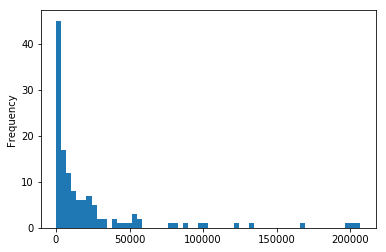

In [25]:
# Plotting
df2.NumberEmployees.plot.hist(bins=60)

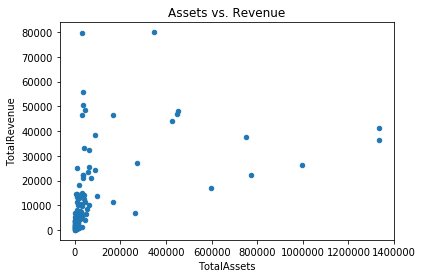

In [26]:
df1.plot.scatter('TotalAssets', 'TotalRevenue')
plt.title('Assets vs. Revenue') # interfaces with matplotlib
plt.show()

In [27]:
# Handy tricks

In [28]:
# Create dummy variables
dummy_df = pd.get_dummies(df1,columns=['PrimarySector'])
print(dummy_df.columns)
dummy_df.head(3)

Index(['Name', 'TotalAssets', 'TotalRevenue', 'GeographicSegments',
       'PrimarySector_Communication Services',
       'PrimarySector_Consumer Discretionary',
       'PrimarySector_Consumer Staples', 'PrimarySector_Energy',
       'PrimarySector_Financials', 'PrimarySector_Health Care',
       'PrimarySector_Industrials', 'PrimarySector_Information Technology',
       'PrimarySector_Materials', 'PrimarySector_Real Estate',
       'PrimarySector_Utilities'],
      dtype='object')


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector_Communication Services,PrimarySector_Consumer Discretionary,PrimarySector_Consumer Staples,PrimarySector_Energy,PrimarySector_Financials,PrimarySector_Health Care,PrimarySector_Industrials,PrimarySector_Information Technology,PrimarySector_Materials,PrimarySector_Real Estate,PrimarySector_Utilities
Ticker,,,,,,,,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,0,0,0,0,0,0,0,0,1,0,0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,0,0,0,0,0,0,1,0,0,0,0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# Create bins
df1['RevenueLevels']=pd.cut(df1.TotalRevenue,3, labels=['Low', 'Medium', 'High'])
print(df1.loc[df1.RevenueLevels=='High'].sample(3))

                                                   Name  TotalAssets  \
Ticker                                                                 
TSX:MG                Magna International Inc. (TSX:MG)      35403.0   
TSX:ATD.B     Alimentation Couche-Tard Inc. (TSX:ATD.B)      30426.3   
TSX:BAM.A  Brookfield Asset Management Inc. (TSX:BAM.A)     349705.7   

           TotalRevenue  GeographicSegments           PrimarySector  \
Ticker                                                                
TSX:MG          55710.1                20.0  Consumer Discretionary   
TSX:ATD.B       79562.8                 3.0        Consumer Staples   
TSX:BAM.A       79975.7                 9.0              Financials   

          RevenueLevels  
Ticker                   
TSX:MG             High  
TSX:ATD.B          High  
TSX:BAM.A          High  


In [30]:
# Correlation matrix
df1.corr()

,TotalAssets,TotalRevenue,GeographicSegments
TotalAssets,1.000000,0.46042,-0.022675
TotalRevenue,0.460420,1.00000,0.092280
GeographicSegments,-0.022675,0.09228,1.000000


In [32]:
# Complex conditions 
rbc = df2.loc['TSX:RY']
print(rbc)

bigger_than_rbc = df2.loc[(df2.MarketCapitalization>rbc.MarketCapitalization) | (df2.NumberEmployees>rbc.NumberEmployees)]
bigger_than_rbc

"rbc = df2.loc['TSX:RY']\nprint(rbc)\n\nbigger_than_rbc = df2.loc[(df2.MarketCapitalization>rbc.MarketCapitalization) | (df2.NumberEmployees>rbc.NumberEmployees)]\nbigger_than_rbc"

In [33]:
# Create a new variable based on conditions
df1['International']=np.where(df1.GeographicSegments>3, True, False) 
# Alternative ways of acheiving this same task: https://datatofish.com/if-condition-in-pandas-dataframe/

df1[['Name','GeographicSegments', 'International']].sample(10)

,Name,GeographicSegments,International
Ticker,,,
TSX:SLF,Sun Life Financial Inc. (TSX:SLF),NaN,False
TSX:AC,Air Canada (TSX:AC),5.0,True
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),3.0,False
TSX:CP,Canadian Pacific Railway Limited (TSX:CP),2.0,False
TSX:CNQ,Canadian Natural Resources Limited (TSX:CNQ),NaN,False
TSX:T,TELUS Corporation (TSX:T),1.0,False
TSX:BYD.UN,Boyd Group Income Fund (TSX:BYD.UN),2.0,False
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),3.0,False
TSX:ONEX,Onex Corporation (TSX:ONEX),5.0,True


In [ ]:
# Exercise:
# 1. Plot the distribution of GeographicSegments
    # Comment on what you see
    # Add a title
    


In [ ]:
# 2 How many companies have both larger market capitalization AND more employees than RBC?
